# Intro to MLFLOW I

In [5]:
import mlflow

In [6]:
MLFLOW_TRACKING_URI = "http://localhost:5000"

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

In [7]:
# if not working this will raise an exception
experiments = mlflow.search_experiments()

## Connect to the Experiment

In [8]:
EXPERIMENT_NAME = "My Experiment"
mlflow.set_experiment(EXPERIMENT_NAME)

<Experiment: artifact_location='mlflow-artifacts:/484051953015737398', creation_time=1750938958768, experiment_id='484051953015737398', last_update_time=1750938958768, lifecycle_stage='active', name='My Experiment', tags={}>

### Create my first run

In [ ]:
with mlflow.start_run():
    #train the model
    #log parameters, metrics, artifacts, etc...
    pass

🏃 View run traveling-hog-399 at: http://localhost:5000/#/experiments/484051953015737398/runs/a78c45d4b7dd4693a45f5561a7c68e22
🧪 View experiment at: http://localhost:5000/#/experiments/484051953015737398


### Log Data into MLFlow

Log Tag

In [18]:
with mlflow.start_run():
    mlflow.set_tag("Model name", "Decision Tree")
    mlflow.set_tag("Author", "David")
    pass

🏃 View run enchanting-vole-922 at: http://localhost:5000/#/experiments/484051953015737398/runs/fc9dc7593bde40c6b16efa191c150315
🧪 View experiment at: http://localhost:5000/#/experiments/484051953015737398


Log Parameters

In [19]:
with mlflow.start_run():
    mlflow.log_param("Test Size", 0.2)
    pass

🏃 View run gaudy-yak-450 at: http://localhost:5000/#/experiments/484051953015737398/runs/9d355f63f88a4ec986be2b419188e2ee
🧪 View experiment at: http://localhost:5000/#/experiments/484051953015737398


Log Metrics

In [12]:
with mlflow.start_run():
    mlflow.set_tag("Model name", "Decision Tree")
    mlflow.log_param("Test Size", 0.2)
    # train your model here
    mlflow.log_metric("Accurancy", 0.95)
    pass

🏃 View run bedecked-foal-577 at: http://localhost:5000/#/experiments/484051953015737398/runs/7252e04f53574affaf2579caea7ef494
🧪 View experiment at: http://localhost:5000/#/experiments/484051953015737398


Log parameters, metrics and tags

In [ ]:
TEST_SIZE = 0.2
MODEL = "Decision Tree"

with mlflow.start_run():
    mlflow.set_tag("Model name", MODEL)
    mlflow.log_param("Test Size", TEST_SIZE)
    # train your model here
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # acc = accuracy_score(y_test, y_pred)
    acc = 0.95  # Example accuracy
    mlflow.log_metric("Accurancy", acc)
    pass

### Log Artifacts

In [1]:
import numpy as np
x = np.random.rand(100, 1)
y = np.random.rand(100, 1)


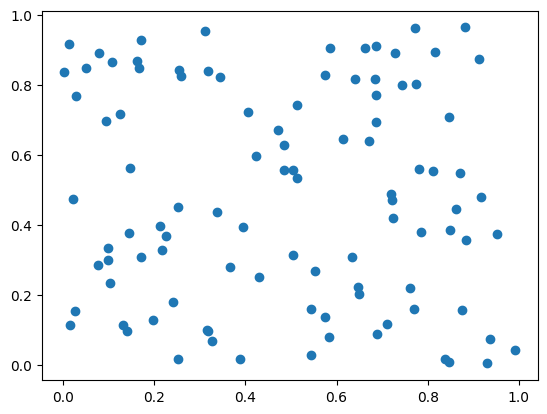

In [3]:
import matplotlib.pyplot as plt

PLOT_PATH = ("plot.png")
plt.scatter(x, y)
plt.savefig(PLOT_PATH)

In [9]:
with mlflow.start_run():
    mlflow.log_artifact(PLOT_PATH)
    pass

🏃 View run powerful-snake-778 at: http://localhost:5000/#/experiments/484051953015737398/runs/7895a639de964bde85f59c82995ad1b8
🧪 View experiment at: http://localhost:5000/#/experiments/484051953015737398


Log Model

In [10]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model

DecisionTreeRegressor()

In [11]:
import mlflow.sklearn


with mlflow.start_run():
    mlflow.sklearn.log_model(model, "model")
    pass

2025/06/26 15:17:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run wise-ox-610 at: http://localhost:5000/#/experiments/484051953015737398/runs/75310e8ed27a48d09179f283eedf697a
🧪 View experiment at: http://localhost:5000/#/experiments/484051953015737398


### Log Model with signature

In [13]:
with mlflow.start_run():
    signature = mlflow.models.infer_signature(model_input=x, model_output=y)
    mlflow.sklearn.log_model(model, "model", signature=signature)
    pass

🏃 View run colorful-panda-781 at: http://localhost:5000/#/experiments/484051953015737398/runs/47038445c872468ebb7874920eb56bba
🧪 View experiment at: http://localhost:5000/#/experiments/484051953015737398


### Log Dataset


In [15]:
import pandas as pd

df = pd.DataFrame({"x": x.flatten(), "y": y.flatten()})


In [16]:
import mlflow.data


with mlflow.start_run():
    dataset = mlflow.data.from_pandas(df)
    mlflow.log_input(dataset)
    pass

🏃 View run burly-grub-375 at: http://localhost:5000/#/experiments/484051953015737398/runs/2c863a7a38e14130ba3eb69859630c81
🧪 View experiment at: http://localhost:5000/#/experiments/484051953015737398


#### Autolog


In [17]:
mlflow.autolog()

2025/06/26 15:34:40 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [19]:
with mlflow.start_run():
    model.fit(x, y)
    model.predict(x)
    pass

🏃 View run suave-moth-546 at: http://localhost:5000/#/experiments/484051953015737398/runs/f5982c0369ec433c99712413020a5d11
🧪 View experiment at: http://localhost:5000/#/experiments/484051953015737398
